## Libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Dados

**Descrição:**

Temos as seguintes colunas: 
- `unfinished` - Representa os projetos não finalizados
- `price` - Representa o preço cobrado para a execução do projeto
- `expected_hours` - Representa a estimativa em horas para a conclusão do projeto

In [2]:
#fonte dos dados
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
#renomeando as colunas
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
# para facilitar o entendimento vamos alterar o não finalizado para finalizado
troca = {0:1, 1:0}

dados['finalizado'] = dados['nao_finalizado'].map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


## Análise Exploratória

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

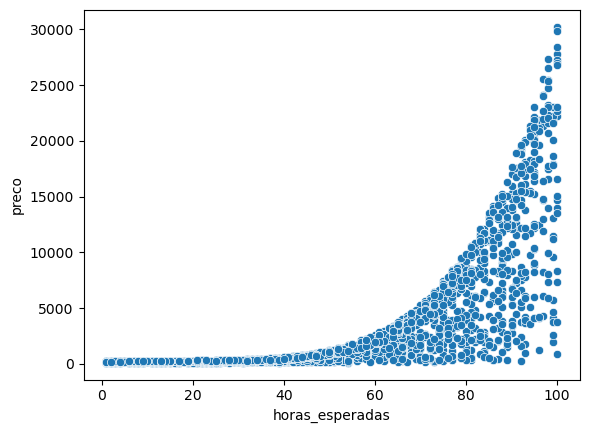

In [6]:
# horas por preço
sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

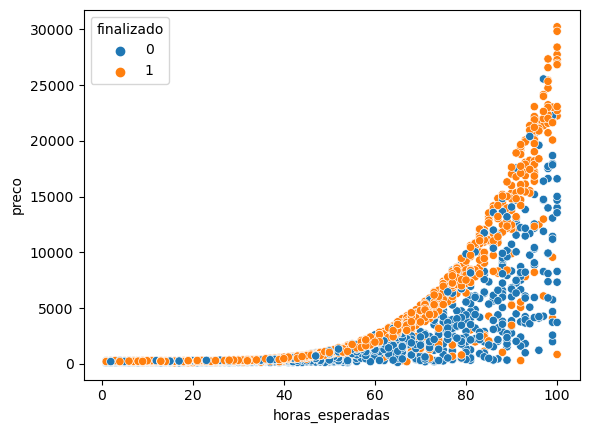

In [7]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado' ,data=dados)

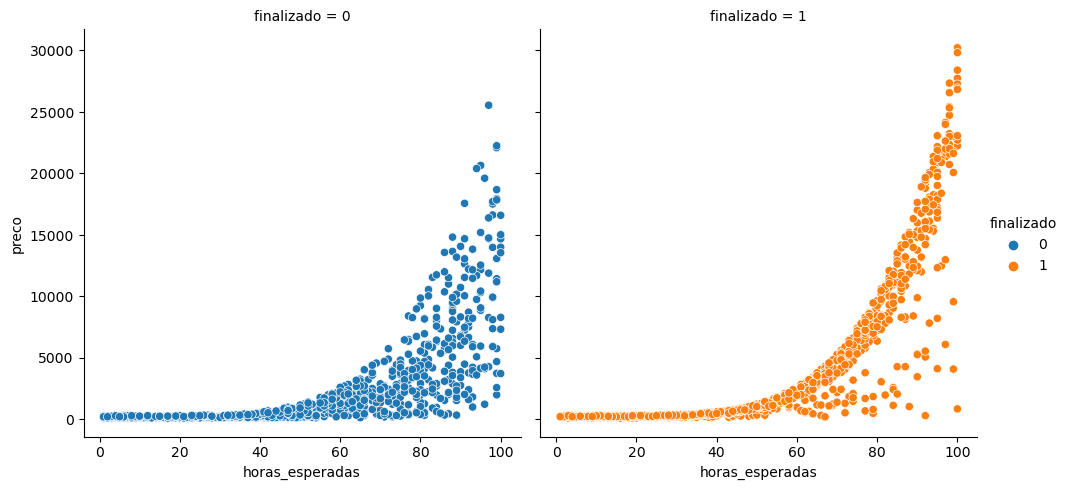

In [8]:
sns.relplot(x='horas_esperadas', y='preco',hue='finalizado', col='finalizado' ,data=dados)

## Predição de projetos finalizados

Dados de treino e teste

In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

### LinearSVC

In [10]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=SEED, test_size=0.25,
                                                        stratify=y)

print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')


modelo = LinearSVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acurácia foi de {round(acuracia,2)}')

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 54.07


/home/fernanda/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
# chutar que todos os elementos de resposta tem o mesmo resultado, nesse caso 1
previsoes_de_base = np.ones(540)
acuracia_de_base = accuracy_score(teste_y, previsoes_de_base)*100
print(f'A acurácia do algoritimo de baseline foi de {round(acuracia_de_base,2)}')

A acurácia do algoritimo de baseline foi de 52.59


In [12]:
# quanto foi melhor em relação ao baseline
print(f'{round((acuracia-acuracia_de_base)/acuracia,2)}%')

0.03%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

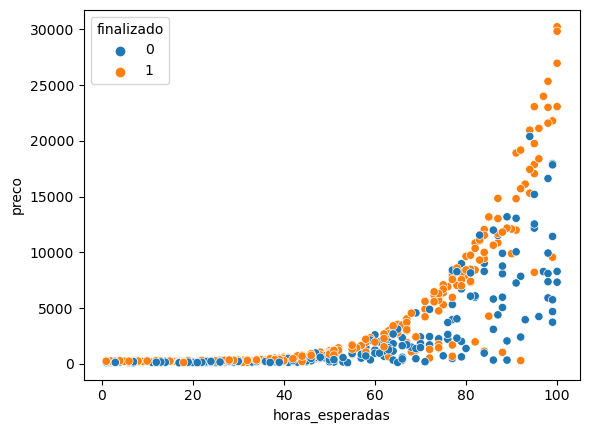

In [13]:
# analisando dados de teste
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y ,data=teste_x)

Quando temos 2 dimensões (variáveis/features) podemos análisar os pixels para colorir a separação da classificação

In [14]:
# horas esperadas
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()

#preço
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

print(f'Eixo x: {x_min}-{x_max}\nEixo y: {y_min}-{y_max}')

Eixo x: 1-100
Eixo y: 100-30223


In [15]:
# normalizar para um espaçamento de 100 pixels
pixels = 100

#redimensiona valores minimos e máximos em um range de valores minimos e máximos
eixo_x = np.arange(x_min, x_max, ((x_max - x_min) / pixels))
eixo_y = np.arange(y_min, y_max, ((y_max - y_min) / pixels))

In [16]:
# cria pontos nos eixos x e y para predição
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [17]:
# redimensiona os pontos em uma matriz
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

/home/fernanda/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

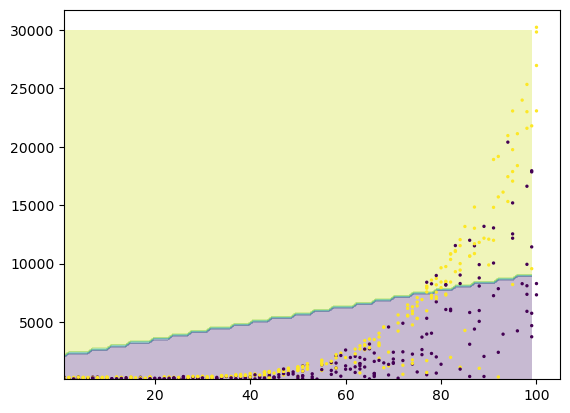

In [18]:
# printa os pontos com contornos das classes
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x['horas_esperadas'],teste_x['preco'], c=teste_y, s=2)

#decision boundary (curva de descisão)

### SVC

#### SVC sem scaler

In [19]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=SEED, test_size=0.25,
                                                        stratify=y)

print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')


modelo = SVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acurácia foi de {round(acuracia,2)}')

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 55.19


A acurácia do algoritimo de baseline foi de 52.59
0.05%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

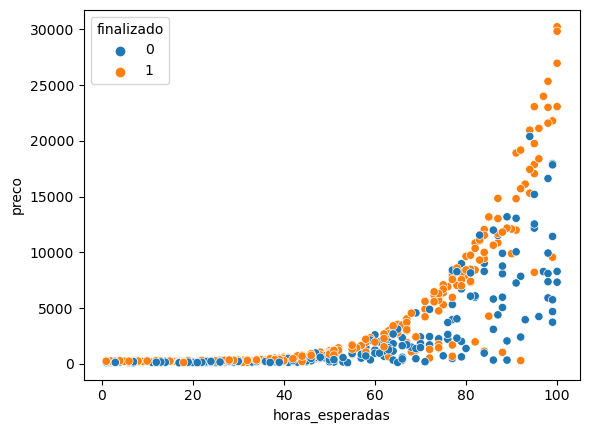

In [20]:
# chutar que todos os elementos de resposta tem o mesmo resultado, nesse caso 1
previsoes_de_base = np.ones(540)
acuracia_de_base = accuracy_score(teste_y, previsoes_de_base)*100
print(f'A acurácia do algoritimo de baseline foi de {round(acuracia_de_base,2)}')

# quanto foi melhor em relação ao baseline
print(f'{round((acuracia-acuracia_de_base)/acuracia,2)}%')

# analisando dados de teste
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y ,data=teste_x)

Eixo x: 1-100
Eixo y: 100-30223


/home/fernanda/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


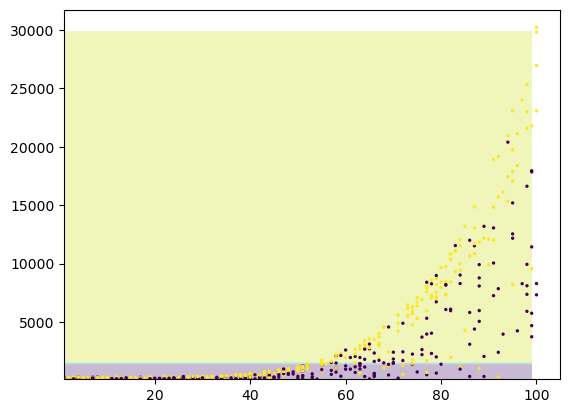

In [21]:
# horas esperadas
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()

#preço
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

print(f'Eixo x: {x_min}-{x_max}\nEixo y: {y_min}-{y_max}')


# normalizar para um espaçamento de 100 pixels
pixels = 100

#redimensiona valores minimos e máximos em um range de valores minimos e máximos
eixo_x = np.arange(x_min, x_max, ((x_max - x_min) / pixels))
eixo_y = np.arange(y_min, y_max, ((y_max - y_min) / pixels))

# cria pontos nos eixos x e y para predição
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

# redimensiona os pontos em uma matriz
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

# printa os pontos com contornos das classes
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x['horas_esperadas'],teste_x['preco'], c=teste_y, s=2)

#decision boundary (curva de descisão)

#### SVC com scaler

In [22]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state=SEED, test_size=0.25,
                                                        stratify=y)
print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')

# redimensiona os valores dos eixos x e y para uma escala próximas de valores entre eles
scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC(random_state=SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acurácia foi de {round(acuracia,2)}')

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 66.85


Eixo x: -1.7348767953644189-1.7418048354450535
Eixo y: -0.5962799114048444-5.406738368968601


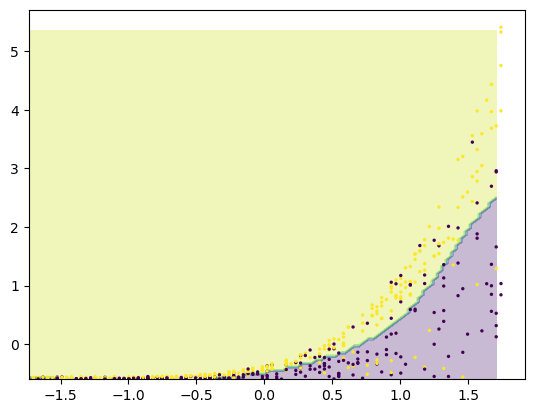

In [23]:
# horas esperadas
data_x = teste_x[:,0] #todas as linhas coluna 0
data_y = teste_x[:,1] #todas as linhas coluna 1

x_min = data_x.min()
x_max = data_x.max()

#preço
y_min = data_y.min()
y_max = data_y.max()

print(f'Eixo x: {x_min}-{x_max}\nEixo y: {y_min}-{y_max}')

# normalizar para um espaçamento de 100 pixels
pixels = 100

#redimensiona valores minimos e máximos em um range de valores minimos e máximos
eixo_x = np.arange(x_min, x_max, ((x_max - x_min) / pixels))
eixo_y = np.arange(y_min, y_max, ((y_max - y_min) / pixels))

# cria pontos nos eixos x e y para predição
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

# redimensiona os pontos em uma matriz
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

# printa os pontos com contornos das classes
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x,data_y, c=teste_y, s=2)

#decision boundary (curva de descisão)

Podemos observar que com o algorítmo SVC tivemos uma predição mais ajustada a curva dos nossos dados, porque diferente do LinearSVC, a predição não segue apenas de acordo com uma divisão linear(linha reta)